In [1]:
import pandas as pd
import world_trade_data as wits
import requests

In [2]:
# Specify years of interest
years = [2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]

bra_imports = []
bra_exports = []

for year in years:
    
    # To begin with, we request the values for the corresponding import and exports.
    # Here, we use the default value for partner='wld', and the default value for product='all'.
    curr_imp = wits.get_indicator('MPRT-TRD-VL', reporter='bra', year=f'{year}')
    curr_exp = wits.get_indicator('XPRT-TRD-VL', reporter='bra', year=f'{year}')
    
    # Remove the first levels of the index
    curr_imp = curr_imp.loc['Annual'].loc['Brazil'].loc['World']
    curr_exp = curr_exp.loc['Annual'].loc['Brazil'].loc['World']
    
    # Rebind Multi level df.index to the ProductCode
    curr_imp.index = curr_imp.index.get_level_values(0)
    curr_exp.index = curr_exp.index.get_level_values(0)
    
    # Get Values for total import/export for the year    
    imp = curr_imp.loc["All Products"]['Value']
    exp = curr_exp.loc["All Products"]['Value']
    
    bra_imports.append(imp)
    bra_exports.append(exp)

bra_imports

[127722340.412,
 181768424.09,
 226246755.801,
 223183474.672,
 239747515.987,
 229154460.893,
 171446211.662,
 137552002.466,
 150749493.921,
 181230498.358,
 177347934.749]

In [4]:
trade_df = pd.DataFrame({
    "Import": bra_imports,
    "Export": bra_exports
}, index = years)
trade_df

,Import,Export
2009,1.277223e+08,1.529947e+08
2010,1.817684e+08,2.019151e+08
2011,2.262468e+08,2.560387e+08
2012,2.231835e+08,2.425780e+08
2013,2.397475e+08,2.420330e+08
2014,2.291545e+08,2.250984e+08
2015,1.714462e+08,1.911269e+08
2016,1.375520e+08,1.852354e+08
2017,1.507495e+08,2.177392e+08
2018,1.812305e+08,2.398878e+08


<AxesSubplot:>

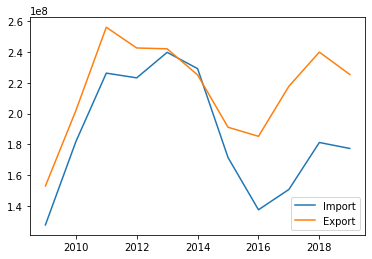

In [5]:
trade_df.plot.line()